In [115]:
import matplotlib
matplotlib.rcParams['font.family']
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np

import pymysql
import matplotlib.pyplot as plt

In [116]:
font_name = fm.FontProperties(fname = 'C:/Windows/Fonts/malgun.ttf').get_name()
matplotlib.rc('font', family = font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

In [117]:
conn = pymysql.connect(host = 'skuser57-instance.ctxvewe48g71.us-west-2.rds.amazonaws.com',port = 3306, user = 'admin', password = 'pax5022kr', db = 'mydb')
curs = conn.cursor()

In [118]:
sql = "SELECT * FROM topic_stock"
curs.execute(sql)
rows = curs.fetchall()

In [119]:
df  = pd.read_sql(sql, conn)

In [107]:
df

,id,stock_rank,title,price,low,volume,payment,buy,sell,capitalization,per,roe,created_at
0,1,1,KODEX 200선물인버스2X,"2,125",+1.67%,"218,249,318","465,132","2,140","2,145","21,093",N/A,N/A,2021-03-17 05:49:44.957
1,1,2,우성사료,"4,550",+30.00%,"60,972,206","259,435","4,550",0,"1,406",24.46,3.29,2021-03-17 05:49:54.979
2,1,3,극동유화,"4,890",+5.27%,"59,137,786","308,659","4,930","4,935","1,705",14.09,8.75,2021-03-17 05:50:04.989
3,1,4,이아이디,418,-0.48%,"42,946,727","18,057",416,417,"3,233",-22.00,0.44,2021-03-17 05:50:15.001
4,1,5,서울식품,438,-3.74%,"37,392,537","16,491",437,438,"1,601",-109.50,-7.65,2021-03-17 05:50:25.011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,96,DB하이텍,"57,200",+0.88%,"1,395,343","80,027","57,000","57,100","25,396",15.43,17.40,2021-03-17 06:05:36.031
96,1,97,LG전자,"158,000",0.00%,"1,391,513","219,997","156,500","157,000","258,564",14.52,13.23,2021-03-17 06:05:46.041
97,1,98,기업은행,"9,110",+0.11%,"1,385,012","12,584","9,090","9,100","67,292",4.65,7.36,2021-03-17 06:05:56.052
98,1,99,SG세계물산,707,-1.12%,"1,384,068",981,704,705,"1,431",-13.86,-5.16,2021-03-17 06:06:06.062


def change_money(data):
    data = data.replace("$","")
    if data[-1] == 'M':
        data = data.replace("M","")
        data = float(data)*1000000
    elif data[-1] == 'K':
        data = data.replace("K","")
        data = float(data)*1000
    return int(data)

def change_people(data):
    return float(data.replace(",",""))


x = np.arange(10)


# jiho
df['weekend'] = df['weekend'].apply(change_money)
df = df.sort_values(by=['weekend'], axis=0, ascending=False)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.3, 0.8, 0.6])
ax.plot(df['title'],df['weekend'])
ax.set_xlabel('title')
ax.set_ylabel('weekend gross')
ax.set_title('movie weekend gross')
plt.xticks(rotation=45)
# plt.show()
plt.savefig('movie_01.png')

# jiho
df['gross'] = df['gross'].apply(change_money)
df = df.sort_values(by=['gross'], axis=0, ascending=False)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.3, 0.8, 0.6])
ax.plot(df['title'],df['gross'])
ax.set_xlabel('title')
ax.set_ylabel('total gross')
ax.set_title('movie total gross')
plt.xticks(rotation=45)
# plt.show()
plt.savefig('movie_02.png')
# print(df)


# # jiho
# df = df.sort_values(by=['rating'], axis=0, ascending=False)
# fig = plt.figure()
# ax = fig.add_axes([0.1, 0.3, 0.8, 0.6])
# ax.barh(df['title'],df['rating'])
# ax.set_xlabel('title')
# ax.set_ylabel('rating')
# ax.set_title('movie rating')
# plt.xticks(rotation=45)
# # plt.show()
# print(df)
# plt.savefig('movie_03.png')


df1 = df.sort_values(by=['rating'], axis=0, ascending=True)
title = df1['title']
rating = df1['rating']
plt.bar(x, rating)
plt.xlabel('title', fontsize=14)
plt.xticks(x,title ,rotation=90)
plt.ylabel('rating',fontsize=14)
# plt.show()
plt.savefig('movie_03.png')
# 주말동안 번 돈


# # jiho
df['people'] = df['people'].apply(change_people)
df = df.sort_values(by=['people'], axis=0, ascending=False)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.3, 0.8, 0.6])
ax.plot(df['title'],df['people'])
ax.set_xlabel('title')
ax.set_ylabel('people')
ax.set_title('movie people')
plt.xticks(rotation=45)
# plt.show()
plt.savefig('movie_04.png')



# jongmin
x = np.arange(10)
weeks = df["weeks"]
title  = df["title"]
plt.bar(x, weeks)
plt.xticks(x,title ,rotation=90)
plt.xlabel('title')
plt.ylabel('weeks')
plt.savefig('movie_05.png')





conn.close()

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymysql
from pandas import DataFrame
from datetime import datetime
import matplotlib.font_manager as fm

plt.rcParams['axes.unicode_minus'] = False
font_name=fm.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()

plt.rc('font', family=font_name)
plt.style.use('ggplot')

class Mdproject3:
    def __init__(self,num):
        self.conn = pymysql.connect(host='skuser55-instance.c1aoapfinmy7.us-east-1.rds.amazonaws.com',port=3306,user='admin',password='y1syitq0is',db='mydb_test')
        self.cursor = self.conn.cursor()
        self.num=num
        self.plt_show()
        
    def newtime(self, x):
        return x.strftime('%Y-%m-%d %H:%M:%S')
    def strtoint(self, x):
        return int(x.replace(",", ""))
    def time_day(self, x):
        return x.split(' ')[0]
    def time_second(self, x):
        return x.split(' ')[1].split(":")[2]
    def save_data(self):
        show_db = '''SELECT * FROM my_topic_foreign_table'''
        self.cursor.execute(show_db)
        data = self.cursor.fetchall()
        pddata = pd.DataFrame(data, columns=["id","stock_name","stock_date","foreign_trading_volume","foreign_rate","create_at"])
        pddata["foreign_trading_volume"] = pddata["foreign_trading_volume"].map(lambda x: self.strtoint(x))
        pddata["create_at"] = pddata["create_at"].map(lambda x: self.newtime(x))
        pddata["time_day"] = pddata["stock_date"].map(lambda x: self.time_day(x))
        pddata["time_second"] = pddata["create_at"].map(lambda x: self.time_second(x))
        return pddata
    def plt_show(self):
        pddata = self.save_data()
        stocks = set()
        for i in pddata["stock_name"]:
            stocks.add(i)
        stocks = list(stocks)
        for i in stocks:
            newpddata = pddata[pddata["stock_name"]==i]
            plt_index = range(len(newpddata[:self.num]))
            fig = plt.figure(figsize=(12,6))
            ax1 = fig.add_subplot(1, 1, 1)
            ax1.bar(plt_index, newpddata['foreign_trading_volume'][:self.num], color='darkblue')
            plt.xticks(plt_index, newpddata['time_day'][:self.num], rotation=70, fontsize='small')
            plt.ticklabel_format(axis='y', style='plain')      
            ax1.xaxis.set_ticks_position('bottom')
            ax1.yaxis.set_ticks_position('left')
            ax1.set_title(i+'_foreign_stock')
            plt.xlabel('day')
            plt.ylabel('volume')
            plt.savefig('foreign_plot_{}_{}.png'.format(i,self.num), dpi=400, bbox_inches='tight')
            ax1.set_xlim(ax1.get_xlim()[::-1])
if __name__ == '__main__':
    Mdproject3(60)

In [120]:
def change_int(data):
    return float(data.replace(",",""))

In [109]:
def change_low(data):
    return float(data.replace("+","")),(data.replace("-","")),(data.replace("%",""))

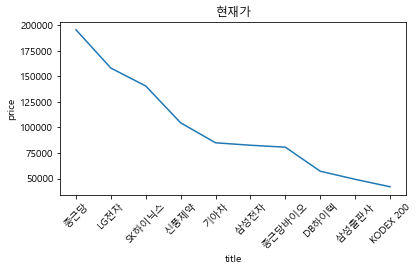

In [121]:
df['price'] = df['price'].apply(change_int)

df = df.sort_values(by=['price'], axis=0, ascending=False).head(10)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.3, 0.8, 0.6])
ax.plot(df['title'],df['price'])
ax.set_xlabel('title')
ax.set_ylabel('price')
ax.set_title('현재가')
plt.xticks(rotation=45)
#plt.show()
plt.savefig('price.png')

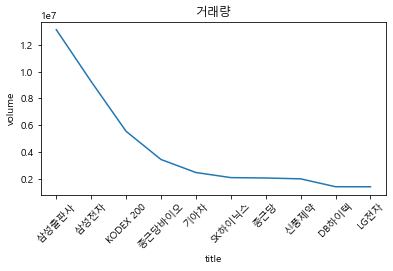

In [111]:
df['volume'] = df['volume'].apply(change_int)

df = df.sort_values(by=['volume'], axis=0, ascending=False).head(10)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.3, 0.8, 0.6])
ax.plot(df['title'],df['volume'])
ax.set_xlabel('title')
ax.set_ylabel('volume')
ax.set_title('거래량')
plt.xticks(rotation=45)
#plt.show()
plt.savefig('volume.png')

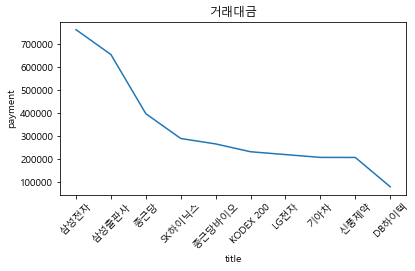

In [112]:
df['payment'] = df['payment'].apply(change_int)

df = df.sort_values(by=['payment'], axis=0, ascending=False).head(10)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.3, 0.8, 0.6])
ax.plot(df['title'],df['payment'])
ax.set_xlabel('title')
ax.set_ylabel('payment')
ax.set_title('거래대금')
plt.xticks(rotation=45)
#plt.show()
plt.savefig('payment.png')

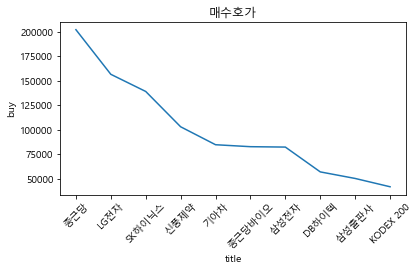

In [113]:
df['buy'] = df['buy'].apply(change_int)

df = df.sort_values(by=['buy'], axis=0, ascending=False).head(10)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.3, 0.8, 0.6])
ax.plot(df['title'],df['buy'])
ax.set_xlabel('title')
ax.set_ylabel('buy')
ax.set_title('매수호가')
plt.xticks(rotation=45)
#plt.show()
plt.savefig('buy.png')

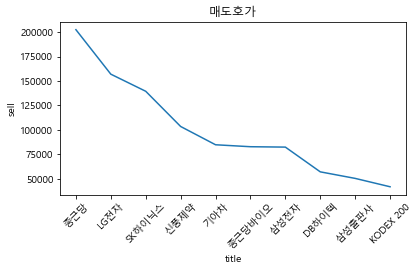

In [114]:
df['sell'] = df['sell'].apply(change_int)

df = df.sort_values(by=['sell'], axis=0, ascending=False).head(10)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.3, 0.8, 0.6])
ax.plot(df['title'],df['sell'])
ax.set_xlabel('title')
ax.set_ylabel('sell')
ax.set_title('매도호가')
plt.xticks(rotation=45)
#plt.show()
plt.savefig('sell.png')